In [5]:
import pickle
import os
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
import copy
import cv2
import tensorflow as tf
from skimage import transform
from skimage.transform import warp, SimilarityTransform, AffineTransform
from skimage import exposure
from sklearn.utils import shuffle
from numpy import random
#from tensorflow.contrib.layers import flatten
print("Packages has been Loaded")

# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data

training_file='C:/Users/Prajwal Amin/Desktop/MCA/3RD SEM/project/dataset/Train.pkl'

validation_file ='C:/Users/Prajwal Amin/Desktop/MCA/3RD SEM/project/dataset/Valid.pkl'
testing_file = 'C:/Users/Prajwal Amin/Desktop/MCA/3RD SEM/project/dataset/Test.pkl'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['ClassId'], train['ClassId']
X_valid, y_valid = valid['ClassId'], valid['ClassId']
X_test, y_test = test['ClassId'], test['ClassId']


Packages has been Loaded


In [12]:
print()
print("Image Shape: {}".format(X_train.shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))



Image Shape: (39209,)

Training Set:   39209 samples
Validation Set: 43 samples
Test Set:       12630 samples


In [22]:
### Replace each question mark with the appropriate value.
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)


# TODO: Number of testing examples.
n_test = len(X_test)


# TODO: What's the shape of an traffic sign image?
image_shape = X_train[9].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Number of validation examples = 43
Image data shape = ()
Number of classes = 43


In [23]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

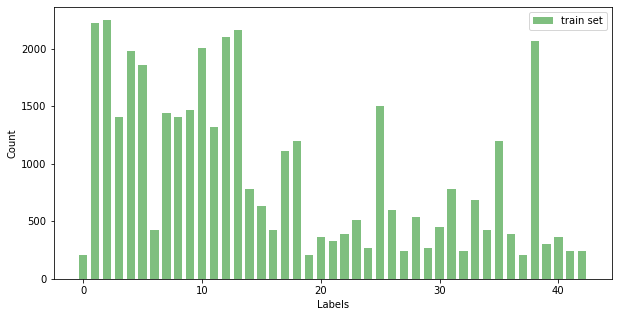

<Figure size 432x288 with 0 Axes>

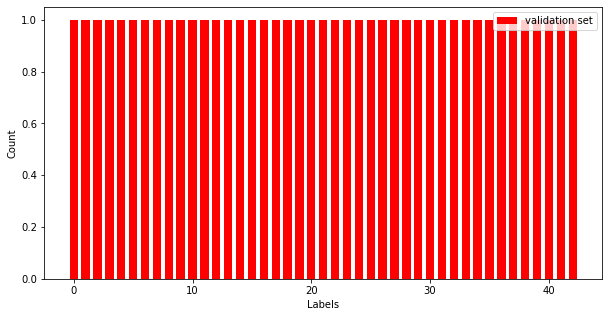

<Figure size 432x288 with 0 Axes>

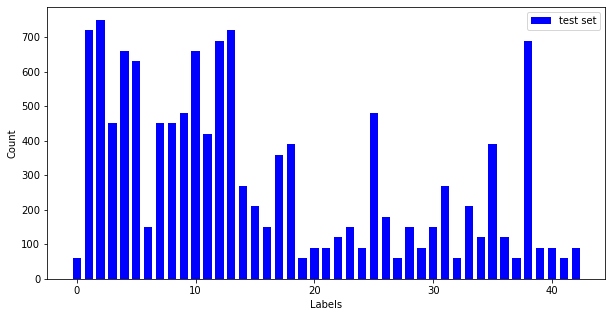

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.7
unique_tr, counts_tr = np.unique(y_train, return_counts=True)
plt.bar(unique_tr, counts_tr, width, alpha=0.5, label='train set', color='g')
plt.legend(loc='upper right')
ax.set_xlabel('Labels')
ax.set_ylabel('Count')

plt.show()
plt.savefig('C:/Users/Prajwal Amin/Desktop/MCA/3RD SEM/project/histogram_1.jpg')

fig, ax = plt.subplots(figsize=(10,5))
width = 0.7
unique_v, counts_v = np.unique(y_valid, return_counts=True)
plt.bar(unique_v, counts_v, width, alpha=1, label='validation set', color='r')
ax.set_xlabel('Labels')
ax.set_ylabel('Count')

plt.legend(loc='upper right')
plt.show()

plt.savefig('C:/Users/Prajwal Amin/Desktop/MCA/3RD SEM/project/histogram_2.jpg')

fig, ax = plt.subplots(figsize=(10,5))
width = 0.7
unique_t, counts_t = np.unique(y_test, return_counts=True)
plt.bar(unique_t, counts_t, width, alpha=1, label='test set', color='b')
plt.legend(loc='upper right')
ax.set_xlabel('Labels')
ax.set_ylabel('Count')

plt.savefig('C:/Users/Prajwal Amin/Desktop/MCA/3RD SEM/project/histogram_3.jpg')
plt.show()



TypeError: Invalid shape () for image data

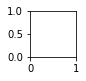

In [25]:
with open('C:/Users/Prajwal Amin/Desktop/MCA/3RD SEM/project/dataset/labels.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader, None)
    sign_names = list(reader)

labels = np.unique(y_train)
for label in labels:
    label_indices = np.where(y_train==label)[0]
    fig = plt.figure(figsize=(10, 10))
    for i in range(10):
        rand_index = random.choice(label_indices)
        sub = fig.add_subplot(10, 10, i+1)
        sub.imshow(X_train[rand_index], interpolation='nearest')
    plt.suptitle(str(label) + ': ' + sign_names[label][1])
    plt.show()
